In [2]:
import numpy as np
import matplotlib.pyplot as plt
import os
from salishsea_tools import geo_tools
from salishsea_tools import viz_tools, places
import pandas as pd
import netCDF4 as nc
import datetime as dt
import linecache
import glob
import f90nml
%matplotlib inline

In [21]:
PATH= '/results2/SalishSea/nowcast-green.201905/'
nml=f90nml.read(os.path.join(PATH,'01jan15','namelist_smelt_cfg'))
mod_chl_N=nml['nampisopt']['zzn2chl']
print('Parameter values from 01jan15 namelist_smelt_cfg:')
print('   Chl:N = ',mod_chl_N)
c_n=106/16

Parameter values from 01jan15 namelist_smelt_cfg:
   Chl:N =  2.0


In [5]:
f=nc.Dataset('/data/eolson/results/MEOPAR/SS36runs/calcFiles/comparePhytoN/ts_HC201905_ProdChl_2015_S3.nc')

In [6]:
f.variables.keys()

dict_keys(['bounds_lat', 'bounds_lon', 'ciliates', 'deptht', 'deptht_bounds', 'diatoms', 'flagellates', 'nav_lat', 'nav_lon', 'time_centered', 'time_centered_bounds', 'time_counter', 'time_counter_bounds', 'PPDIAT', 'PPMRUB', 'PPPHY'])

In [12]:
f.variables['deptht']

<class 'netCDF4._netCDF4.Variable'>
float32 deptht(deptht)
    name: deptht
    long_name: Vertical T levels
    units: m
    axis: Z
    positive: down
    bounds: deptht_bounds
unlimited dimensions: 
current shape = (40,)
filling on, default _FillValue of 9.969209968386869e+36 used

Text(0, 0.5, 'Depth (m)')

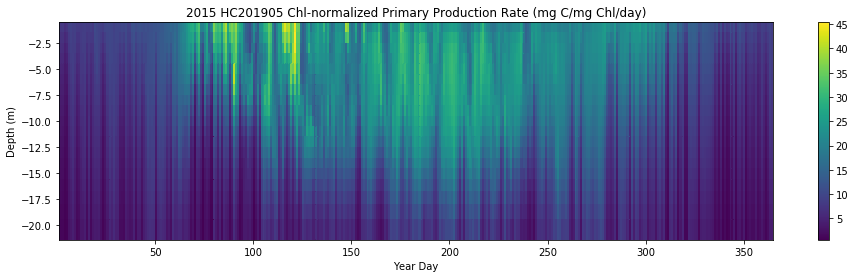

In [24]:
k=20
fig,ax=plt.subplots(1,1,figsize=(16,4))
m=ax.pcolormesh(np.arange(1,366),-1*f.variables['deptht'][:k],(24*3600*c_n* 12.0*(f.variables['PPDIAT'][:,:k,0,0]+f.variables['PPMRUB'][:,:k,0,0]+f.variables['PPPHY'][:,:k,0,0])/\
        (mod_chl_N*(f.variables['diatoms'][:,:k,0,0]+f.variables['flagellates'][:,:k,0,0]+f.variables['ciliates'][:,:k,0,0]))).T)
plt.colorbar(m,ax=ax)
ax.set_title('2015 HC201905 Chl-normalized Primary Production Rate (mg C/mg Chl/day)')
ax.set_xlabel('Year Day')
ax.set_ylabel('Depth (m)')

(mmolN/m3/s)/(mgChl/m3)*24*3600 s/day * c_n mmolC/mmolN * 12.0 mgC/mmolC = mg C/m3/day/(mg Chl/m3) = mgC/mgChl/day

18.754797098865247


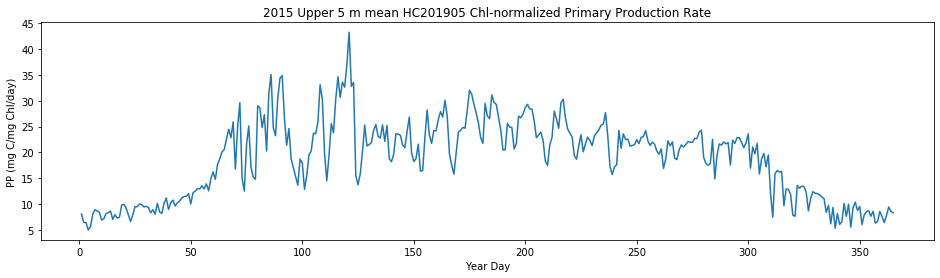

In [27]:
k=5
fig,ax=plt.subplots(1,1,figsize=(16,4))
m=ax.plot(np.arange(1,366),np.mean(24*3600*c_n* 12.0*(f.variables['PPDIAT'][:,:k,0,0]+f.variables['PPMRUB'][:,:k,0,0]+f.variables['PPPHY'][:,:k,0,0])/\
        (mod_chl_N*(f.variables['diatoms'][:,:k,0,0]+f.variables['flagellates'][:,:k,0,0]+f.variables['ciliates'][:,:k,0,0])),1))
ax.set_title('2015 Upper 5 m mean HC201905 Chl-normalized Primary Production Rate')
ax.set_xlabel('Year Day')
ax.set_ylabel('PP (mg C/mg Chl/day)')
print(np.mean(np.mean(24*3600*c_n* 12.0*(f.variables['PPDIAT'][:,:k,0,0]+f.variables['PPMRUB'][:,:k,0,0]+f.variables['PPPHY'][:,:k,0,0])/\
        (mod_chl_N*(f.variables['diatoms'][:,:k,0,0]+f.variables['flagellates'][:,:k,0,0]+f.variables['ciliates'][:,:k,0,0])),1)))

In [3]:
#2012:
dfs=list()
df=pd.read_csv('/ocean/eolson/MEOPAR/obs/ONC/turbidity/nearSurface/search3928586/BritishColumbiaFerries_Tsawwassen-DukePoint_Turbidity-ChlorophyllandFluorescence_20120509T231233Z_20130117T052029Z-clean.csv',
        skiprows=78,header=None,
        names=('TimeUTC','CDOM','CDOMQC','Chlorophyll_ug','ChlQC','Turbidity_NTU','TurbQC','Lat','LatQC','Lon','LongQC'))
df['Lat']=pd.to_numeric(df['Lat'],errors='coerce')
df['Lon']=pd.to_numeric(df['Lon'],errors='coerce')
df['Chlorophyll_ug']=pd.to_numeric(df['Chlorophyll_ug'],errors='coerce')
iidfnd=(df.Lon>llon)&(df.Lon<ulon)&(df.Lat>llat)&(df.Lat<ulat)&(df.Chlorophyll_ug>=0)
dfs.append(df.loc[iidfnd].reset_index().copy(deep=True))

/home/eolson/anaconda3/envs/py38/lib/python3.8/site-packages/IPython/core/interactiveshell.py:3050: DtypeWarning: Columns (7,9) have mixed types. Specify dtype option on import or set low_memory=False.
  has_raised = await self.run_ast_nodes(code_ast.body, cell_name,


In [4]:
#2013:
df=pd.read_csv('/ocean/eolson/MEOPAR/obs/ONC/turbidity/nearSurface/search3928586/BritishColumbiaFerries_Tsawwassen-DukePoint_Turbidity-ChlorophyllandFluorescence_20130117T052039Z_20131214T042429Z-clean.csv',
        skiprows=78,header=None,
        names=('TimeUTC','CDOM','CDOMQC','Chlorophyll_ug','ChlQC','Turbidity_NTU','TurbQC','Lat','LatQC','Lon','LongQC'))
df['Lat']=pd.to_numeric(df['Lat'],errors='coerce')
df['Lon']=pd.to_numeric(df['Lon'],errors='coerce')
df['Chlorophyll_ug']=pd.to_numeric(df['Chlorophyll_ug'],errors='coerce')
iidfnd=(df.Lon>llon)&(df.Lon<ulon)&(df.Lat>llat)&(df.Lat<ulat)&(df.Chlorophyll_ug>=0)
dfs.append(df.loc[iidfnd].reset_index().copy(deep=True))

In [5]:
# 2014
df=pd.read_csv('/ocean/eolson/MEOPAR/obs/ONC/turbidity/nearSurface/search3928586/BritishColumbiaFerries_Tsawwassen-DukePoint_Turbidity-ChlorophyllandFluorescence_20131214T042439Z_20140804T234320Z-clean.csv',
        skiprows=78,header=None,
        names=('TimeUTC','CDOM','CDOMQC','Chlorophyll_ug','ChlQC','Turbidity_NTU','TurbQC','Lat','LatQC','Lon','LongQC'))
df['Lat']=pd.to_numeric(df['Lat'],errors='coerce')
df['Lon']=pd.to_numeric(df['Lon'],errors='coerce')
df['Chlorophyll_ug']=pd.to_numeric(df['Chlorophyll_ug'],errors='coerce')
iidfnd=(df.Lon>llon)&(df.Lon<ulon)&(df.Lat>llat)&(df.Lat<ulat)&(df.Chlorophyll_ug>=0)
dfs.append(df.loc[iidfnd].reset_index().copy(deep=True))

/home/eolson/anaconda3/envs/py38/lib/python3.8/site-packages/IPython/core/interactiveshell.py:3050: DtypeWarning: Columns (1,3,5) have mixed types. Specify dtype option on import or set low_memory=False.
  has_raised = await self.run_ast_nodes(code_ast.body, cell_name,


In [6]:
#2015
df=pd.read_csv('/ocean/eolson/MEOPAR/obs/ONC/turbidity/nearSurface/search3928586/BritishColumbiaFerries_Tsawwassen-DukePoint_Turbidity-ChlorophyllandFluorescence_20140804T234330Z_20150604T070614Z-clean.csv',
        skiprows=78,header=None,
        names=('TimeUTC','CDOM','CDOMQC','Chlorophyll_ug','ChlQC','Turbidity_NTU','TurbQC','Lat','LatQC','Lon','LongQC'))
df['Lat']=pd.to_numeric(df['Lat'],errors='coerce')
df['Lon']=pd.to_numeric(df['Lon'],errors='coerce')
df['Chlorophyll_ug']=pd.to_numeric(df['Chlorophyll_ug'],errors='coerce')
iidfnd=(df.Lon>llon)&(df.Lon<ulon)&(df.Lat>llat)&(df.Lat<ulat)&(df.Chlorophyll_ug>=0)
dfs.append(df.loc[iidfnd].reset_index().copy(deep=True))

df=pd.read_csv('/ocean/eolson/MEOPAR/obs/ONC/turbidity/nearSurface/search3928586/BritishColumbiaFerries_Tsawwassen-DukePoint_Turbidity-ChlorophyllandFluorescence_20150604T070624Z_20160307T160206Z-clean.csv',
        skiprows=78,header=None,
        names=('TimeUTC','CDOM','CDOMQC','Chlorophyll_ug','ChlQC','Turbidity_NTU','TurbQC','Lat','LatQC','Lon','LongQC'))
df['Lat']=pd.to_numeric(df['Lat'],errors='coerce')
df['Lon']=pd.to_numeric(df['Lon'],errors='coerce')
df['Chlorophyll_ug']=pd.to_numeric(df['Chlorophyll_ug'],errors='coerce')
iidfnd=(df.Lon>llon)&(df.Lon<ulon)&(df.Lat>llat)&(df.Lat<ulat)&(df.Chlorophyll_ug>=0)
dfs.append(df.loc[iidfnd].reset_index().copy(deep=True))

/home/eolson/anaconda3/envs/py38/lib/python3.8/site-packages/IPython/core/interactiveshell.py:3050: DtypeWarning: Columns (3) have mixed types. Specify dtype option on import or set low_memory=False.
  has_raised = await self.run_ast_nodes(code_ast.body, cell_name,


In [7]:
#2016
df=pd.read_csv('/ocean/eolson/MEOPAR/obs/ONC/turbidity/nearSurface/search3928586/BritishColumbiaFerries_Tsawwassen-DukePoint_Turbidity-ChlorophyllandFluorescence_20150604T070624Z_20160307T160206Z-clean.csv',
        skiprows=78,header=None,
        names=('TimeUTC','CDOM','CDOMQC','Chlorophyll_ug','ChlQC','Turbidity_NTU','TurbQC','Lat','LatQC','Lon','LongQC'))
df['Lat']=pd.to_numeric(df['Lat'],errors='coerce')
df['Lon']=pd.to_numeric(df['Lon'],errors='coerce')
df['Chlorophyll_ug']=pd.to_numeric(df['Chlorophyll_ug'],errors='coerce')
iidfnd=(df.Lon>llon)&(df.Lon<ulon)&(df.Lat>llat)&(df.Lat<ulat)&(df.Chlorophyll_ug>=0)
dfs.append(df.loc[iidfnd].reset_index().copy(deep=True))

df=pd.read_csv('/ocean/eolson/MEOPAR/obs/ONC/turbidity/nearSurface/search3928586/BritishColumbiaFerries_Tsawwassen-DukePoint_Turbidity-ChlorophyllandFluorescence_20160307T160215Z_20161019T064047Z-clean.csv',
        skiprows=78,header=None,
        names=('TimeUTC','CDOM','CDOMQC','Chlorophyll_ug','ChlQC','Turbidity_NTU','TurbQC','Lat','LatQC','Lon','LongQC'))
df['Lat']=pd.to_numeric(df['Lat'],errors='coerce')
df['Lon']=pd.to_numeric(df['Lon'],errors='coerce')
df['Chlorophyll_ug']=pd.to_numeric(df['Chlorophyll_ug'],errors='coerce')
iidfnd=(df.Lon>llon)&(df.Lon<ulon)&(df.Lat>llat)&(df.Lat<ulat)&(df.Chlorophyll_ug>=0)
dfs.append(df.loc[iidfnd].reset_index().copy(deep=True))

df=pd.read_csv('/ocean/eolson/MEOPAR/obs/ONC/turbidity/nearSurface/search3928586/BritishColumbiaFerries_Tsawwassen-DukePoint_Turbidity-ChlorophyllandFluorescence_20161019T064056Z_20161115T220747Z-clean.csv',
        skiprows=78,header=None,
        names=('TimeUTC','CDOM','CDOMQC','Chlorophyll_ug','ChlQC','Turbidity_NTU','TurbQC','Lat','LatQC','Lon','LongQC'))
df['Lat']=pd.to_numeric(df['Lat'],errors='coerce')
df['Lon']=pd.to_numeric(df['Lon'],errors='coerce')
df['Chlorophyll_ug']=pd.to_numeric(df['Chlorophyll_ug'],errors='coerce')
iidfnd=(df.Lon>llon)&(df.Lon<ulon)&(df.Lat>llat)&(df.Lat<ulat)&(df.Chlorophyll_ug>=0)
dfs.append(df.loc[iidfnd].reset_index().copy(deep=True))


In [8]:
#2017
flist=glob.glob('/ocean/eolson/MEOPAR/obs/ONC/turbidity/nearSurface/search4979680/*Tsawwassen-DukePoint_Turbidity*')
for ii in range(0,len(flist)):
    df=pd.read_csv(flist[ii],
        skiprows=67,header=None,usecols=[0,1,2,3,4,5,6,7,8,9,10],
        names=('TimeUTC','CDOM','CDOMQC','Chlorophyll_ug','ChlQC','Turbidity_NTU','TurbQC','Lat','LatQC','Lon','LongQC'))
    df['Lat']=pd.to_numeric(df['Lat'],errors='coerce')
    df['Lon']=pd.to_numeric(df['Lon'],errors='coerce')
    df['Chlorophyll_ug']=pd.to_numeric(df['Chlorophyll_ug'],errors='coerce')
    iidfnd=(df.Lon>llon)&(df.Lon<ulon)&(df.Lat>llat)&(df.Lat<ulat)&(df.Chlorophyll_ug>=0)
    dfs.append(df.loc[iidfnd].reset_index().copy(deep=True))


/home/eolson/anaconda3/envs/py38/lib/python3.8/site-packages/IPython/core/interactiveshell.py:3050: DtypeWarning: Columns (1) have mixed types. Specify dtype option on import or set low_memory=False.
  has_raised = await self.run_ast_nodes(code_ast.body, cell_name,
/home/eolson/anaconda3/envs/py38/lib/python3.8/site-packages/IPython/core/interactiveshell.py:3050: DtypeWarning: Columns (3,5,7,9) have mixed types. Specify dtype option on import or set low_memory=False.
  has_raised = await self.run_ast_nodes(code_ast.body, cell_name,
/home/eolson/anaconda3/envs/py38/lib/python3.8/site-packages/IPython/core/interactiveshell.py:3050: DtypeWarning: Columns (1,3,5,7,9) have mixed types. Specify dtype option on import or set low_memory=False.
  has_raised = await self.run_ast_nodes(code_ast.body, cell_name,


In [9]:
#2017-2018
flist=glob.glob('/ocean/eolson/MEOPAR/obs/ONC/turbidity/nearSurface/search7672208/*Tsawwassen-DukePoint_Turbidity*')
for ii in range(0,len(flist)):
    df=pd.read_csv(flist[ii],
        skiprows=59,header=None,usecols=[0,1,2,3,4,5,6,7,8,9,10],
        names=('TimeUTC','CDOM','CDOMQC','Chlorophyll_ug','ChlQC','Turbidity_NTU','TurbQC','Lat','LatQC','Lon','LongQC'))
    df['Lat']=pd.to_numeric(df['Lat'],errors='coerce')
    df['Lon']=pd.to_numeric(df['Lon'],errors='coerce')
    df['Chlorophyll_ug']=pd.to_numeric(df['Chlorophyll_ug'],errors='coerce')
    iidfnd=(df.Lon>llon)&(df.Lon<ulon)&(df.Lat>llat)&(df.Lat<ulat)&(df.Chlorophyll_ug>=0)
    dfs.append(df.loc[iidfnd].reset_index().copy(deep=True))

/home/eolson/anaconda3/envs/py38/lib/python3.8/site-packages/IPython/core/interactiveshell.py:3050: DtypeWarning: Columns (5) have mixed types. Specify dtype option on import or set low_memory=False.
  has_raised = await self.run_ast_nodes(code_ast.body, cell_name,


In [10]:
#2018-
flist=glob.glob('/ocean/eolson/MEOPAR/obs/ONC/turbidity/nearSurface/search13411521/*Tsawwassen-DukePoint_Turbidity*')
for ii in range(0,len(flist)):
    df=pd.read_csv(flist[ii],
        skiprows=61,header=None,usecols=[0,1,2,3,4,5,6,7,8,9,10],
        names=('TimeUTC','CDOM','CDOMQC','Chlorophyll_ug','ChlQC','Turbidity_NTU','TurbQC','Lat','LatQC','Lon','LongQC'))
    df['Lat']=pd.to_numeric(df['Lat'],errors='coerce')
    df['Lon']=pd.to_numeric(df['Lon'],errors='coerce')
    df['Chlorophyll_ug']=pd.to_numeric(df['Chlorophyll_ug'],errors='coerce')
    iidfnd=(df.Lon>llon)&(df.Lon<ulon)&(df.Lat>llat)&(df.Lat<ulat)&(df.Chlorophyll_ug>=0)
    dfs.append(df.loc[iidfnd].reset_index().copy(deep=True))

/home/eolson/anaconda3/envs/py38/lib/python3.8/site-packages/IPython/core/interactiveshell.py:3050: DtypeWarning: Columns (1,3,7,9) have mixed types. Specify dtype option on import or set low_memory=False.
  has_raised = await self.run_ast_nodes(code_ast.body, cell_name,
/home/eolson/anaconda3/envs/py38/lib/python3.8/site-packages/IPython/core/interactiveshell.py:3050: DtypeWarning: Columns (3,7,9) have mixed types. Specify dtype option on import or set low_memory=False.
  has_raised = await self.run_ast_nodes(code_ast.body, cell_name,


In [11]:
df0=pd.concat(dfs,ignore_index=True)

In [12]:
dts=[dt.datetime(int(r[0:4]),int(r[5:7]),int(r[8:10]),int(r[11:13]),int(r[14:16]),int(r[17:19])) for r in df0['TimeUTC']]
df0=df0.assign(dts=dts)

In [13]:
df0['Year']=[int(ii.year) for ii in df0['dts']]

In [14]:
df0['YearDay']=[int((ii-dt.datetime(ii.year-1,12,31)).total_seconds()/(24*3600)) for ii in df0['dts']]

In [15]:
df0['rd']=[int((ii-dt.datetime(2000,1,1)).total_seconds()/(24*3600)) for ii in df0['dts']]

In [16]:
dfM=df0.groupby(['rd']).mean().reset_index()

In [17]:
dfM.loc[:,['Year','YearDay','Chlorophyll_ug']].head()

,Year,YearDay,Chlorophyll_ug
0,2012.0,131.0,5.747836
1,2012.0,132.0,5.919421
2,2012.0,133.0,3.728985
3,2012.0,134.0,1.100204
4,2012.0,135.0,0.806439


In [18]:
df3=dfM.pivot_table(index='YearDay',columns='Year',values='Chlorophyll_ug')

In [19]:
df4=df3.reset_index().copy(deep=True)

In [20]:
df4.keys()

Index(['YearDay',    2012.0,    2013.0,    2014.0,    2015.0,    2016.0,
          2017.0,    2018.0,    2019.0,    2020.0],
      dtype='object', name='Year')

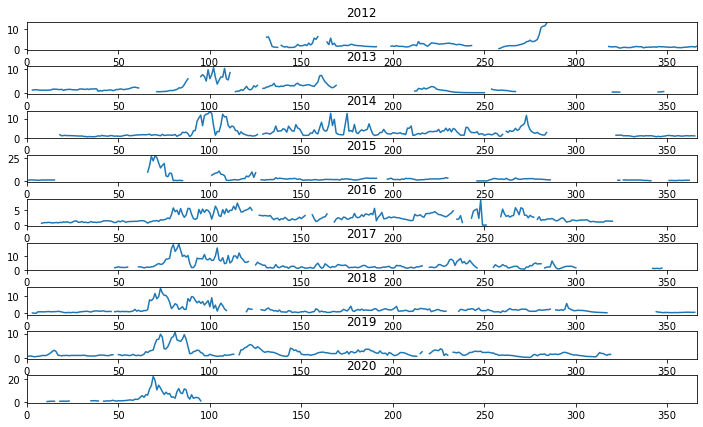

In [21]:
i=0
fig,ax=plt.subplots(9,1,figsize=(12,7))
fig.subplots_adjust(hspace=.6)
for yr in (2012, 2013, 2014, 2015, 2016, 2017,2018,2019,2020):
    ax[i].plot(df4['YearDay'],df4[yr])
    ax[i].set_title(str(yr))
    ax[i].set_xlim(0,366)
    i+=1
fig.savefig('bloomTiming.png')

In [22]:
df4.to_csv ('bloomTiming.csv', index = False, header=True,na_rep=np.nan)